In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [29]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'cities_clalit.csv',
 'clalit.ipynb',
 'config.py',
 'data_loader.py',
 'login.txt',
 'requirements.txt',
 'ShufersalParser.ipynb',
 'splits.csv',
 'stats',
 'Strauss.ipynb',
 'Untitled.ipynb',
 'utils.py']

In [21]:
df = pd.read_csv('./splits.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60418 entries, 0 to 60417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        60418 non-null  int64  
 1   pop_name          60418 non-null  object 
 2   condition         60418 non-null  object 
 3   test_name         60418 non-null  object 
 4   first_split       60355 non-null  object 
 5   first_split_val   58850 non-null  object 
 6   second_split      57100 non-null  object 
 7   second_split_val  57100 non-null  object 
 8   third_split       39159 non-null  object 
 9   third_split_val   39159 non-null  object 
 10  fourth_split      11498 non-null  object 
 11  fourth_split_val  11498 non-null  object 
 12  low_val_pct       60418 non-null  float64
 13  normal_pct        60418 non-null  float64
 14  high_val_pct      60418 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 6.9+ MB


In [22]:
df = df[df.condition == 'active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0']
df = df[df.pop_name == 'overall']

In [23]:
import numpy as np
paths = df[df.condition == 'active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0'][['first_split','second_split', 'third_split', 'fourth_split']]
paths = {tuple(x[1]) for x in paths.iterrows()}
paths = {tuple(['{}_{}'.format(i,x) for i, x in enumerate(p) if type(x) == str]) for p in paths}
len(paths)

68

In [24]:
import networkx as nx
paths = {x for x in paths if len(x) and x[0] in {
 '0_age_group',
 '0_birth_area',
 '0_bmi_category',
 '0_district',
 '0_ethnicity',
 '0_gender',
 '0_sector',
 '0_ses',
 '0_smoking_status',
 '0_time_from_immigartion'}}

C:\Users\Chapanin\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


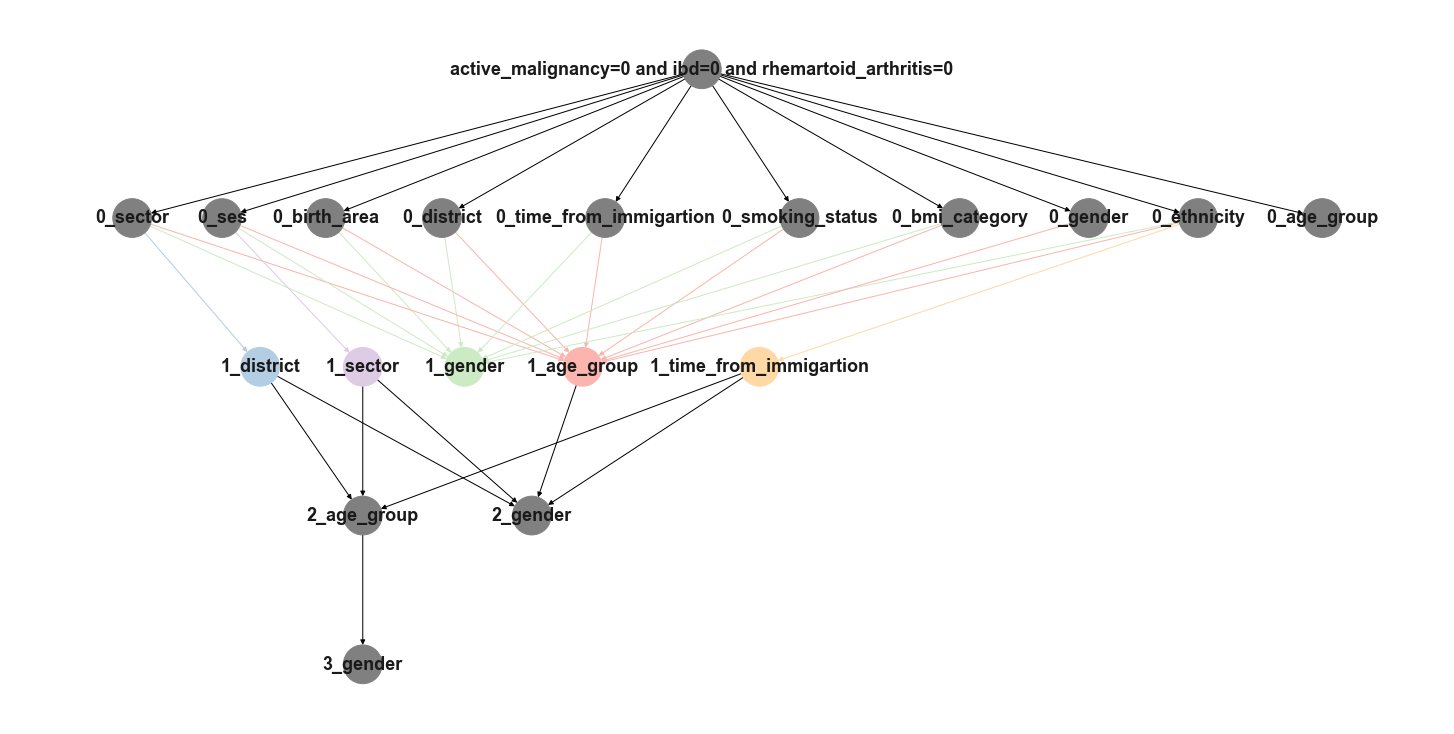

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

colors = plt.cm.Pastel1.colors
colored_nodes = sorted({x[1] for x in paths if len(x) > 1})
colors = {x: colors[i] for i,x in enumerate(colored_nodes)}

G = nx.DiGraph()

for k, v in colors.items():
    G.add_node(k, color=v)
for p in paths:
    G.add_edges_from([('active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0', p[0])])
    for i in range(len(p)-1):
        G.add_edge(p[i], p[i+1])

plt.figure(figsize=(20,10))
    
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_weight='bold',node_size=1500, font_size=18, node_color=[colors.get(x, 'gray') for x in G.nodes], edge_color=[colors.get(v, 'black') for u,v in G.edges])
plt.show()
    #nx.draw(G, with_labels=True, font_weight='bold')

In [8]:
districts = """Jerusalem/1
Tel Aviv/2
Dan - Petach Tikva/4
Haifa/5
Central/7
South/9
Sharon - Shomron/12
North/15
Eilat/16""".split('\n')
districts = [x.split('/') for x in districts]
districts = {x[1]: x[0] for x in districts}
districts

{'1': 'Jerusalem',
 '2': 'Tel Aviv',
 '4': 'Dan - Petach Tikva',
 '5': 'Haifa',
 '7': 'Central',
 '9': 'South',
 '12': 'Sharon - Shomron',
 '15': 'North',
 '16': 'Eilat'}

In [26]:
tmp.shape

(2216, 17)

In [16]:
tmp = df[(df.first_split == 'sector') & (df.second_split == 'district')& (df.third_split == 'age_group')& (df.fourth_split.isna())]
tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
tmp = tmp[tmp.sector != 'Arab']
tmp[(tmp.sector=='Others') & (tmp.test_name == 'transf') & (tmp.third_split_val == '66-79')]

<ipython-input-16-bec66ace91b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
<ipython-input-16-bec66ace91b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])


,Unnamed: 0,pop_name,condition,test_name,first_split,first_split_val,second_split,second_split_val,third_split,third_split_val,fourth_split,fourth_split_val,low_val_pct,normal_pct,high_val_pct,district,sector
7587,7588,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,4,age_group,66-79,NaN,NaN,0.107,0.865,0.028,Dan - Petach Tikva,Others
9263,9264,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,2,age_group,66-79,NaN,NaN,0.082,0.891,0.027,Tel Aviv,Others
22962,22963,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,5,age_group,66-79,NaN,NaN,0.123,0.853,0.024,Haifa,Others
24535,24536,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,9,age_group,66-79,NaN,NaN,0.102,0.861,0.037,South,Others
39722,39723,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,12,age_group,66-79,NaN,NaN,0.107,0.866,0.027,Sharon - Shomron,Others
45862,45863,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,7,age_group,66-79,NaN,NaN,0.091,0.881,0.028,Central,Others
45946,45947,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,15,age_group,66-79,NaN,NaN,0.090,0.876,0.034,North,Others
46082,46083,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,1,age_group,66-79,NaN,NaN,0.078,0.885,0.037,Jerusalem,Others
53295,53296,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,transf,sector,9,district,16,age_group,66-79,NaN,NaN,0.149,0.792,0.059,Eilat,Others


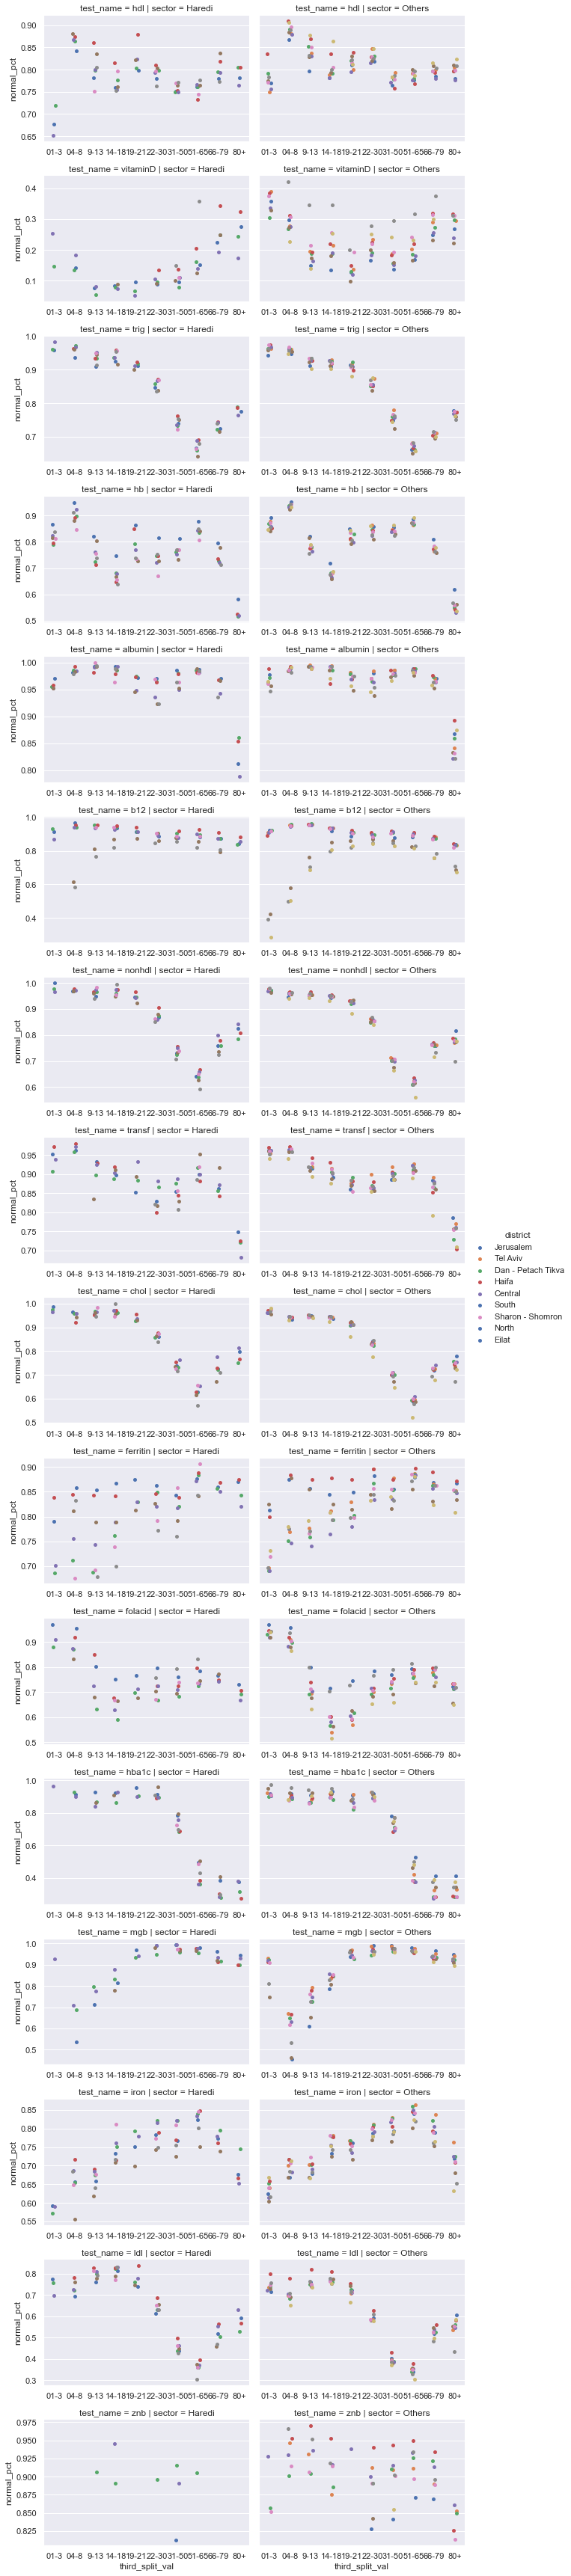

In [18]:
g = sns.FacetGrid(data=tmp, row='test_name', col='sector', sharex='none',sharey='row', aspect=1.5, height=3, hue='district', hue_order = list(districts.values()))
g.map(sns.stripplot, "third_split_val", "normal_pct",  order=sorted(tmp.third_split_val.unique(), key=lambda x: int(x.split('-')[0].split('+')[0])))
g.add_legend()